In [1]:
from collections import defaultdict
import sys, os, re, argparse, natsort
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/hide the code."></form>''')

In [2]:
df = pd.read_csv("../mapping_stats.tsv", sep = '\t')

In [3]:
# Compute the number of unmapped reads:
df["unmapped"] = (df['nb input reads'] - (df['uniquely mapped'] +  df['multiple loci'] + df['too many loci'] +
                  df['chimeric reads']))  

# Create new column with the concatenation of sample and read names:
sample = df["sample"].to_list() 
read = df["type"].to_list()
sample_read = [i + "-" + j for i, j in zip(sample, read)] 
df["sample-read"] = sample_read

# Create a new table with columns of interest:
columns_clean = ['sample', 'type', 'sample-read', 'uniquely mapped', 
                 'multiple loci', 'unmapped']
df_clean = pd.DataFrame(df, columns=columns_clean)
#display(df_clean)

### Bos taurus

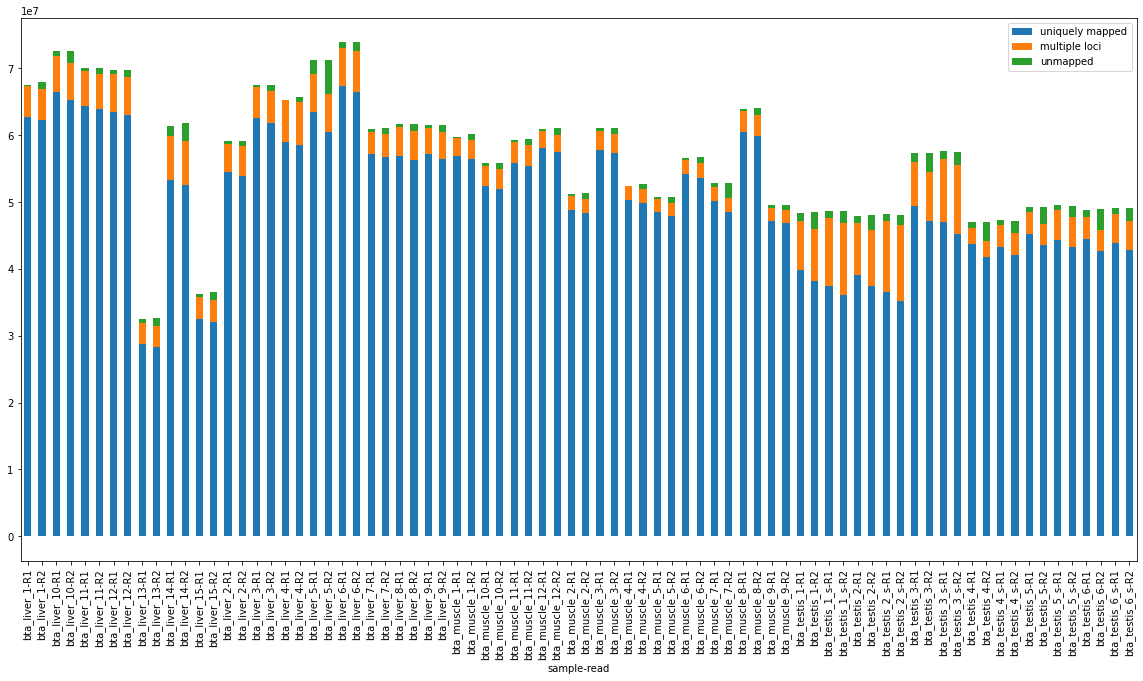

In [4]:
df_sub = df_clean[df_clean['sample'].str.contains("bta") & (~df_clean['type'].str.contains("pe"))]
axes = df_sub.plot.bar(x='sample-read', stacked=True, figsize=(20,10))

### Ovis aries

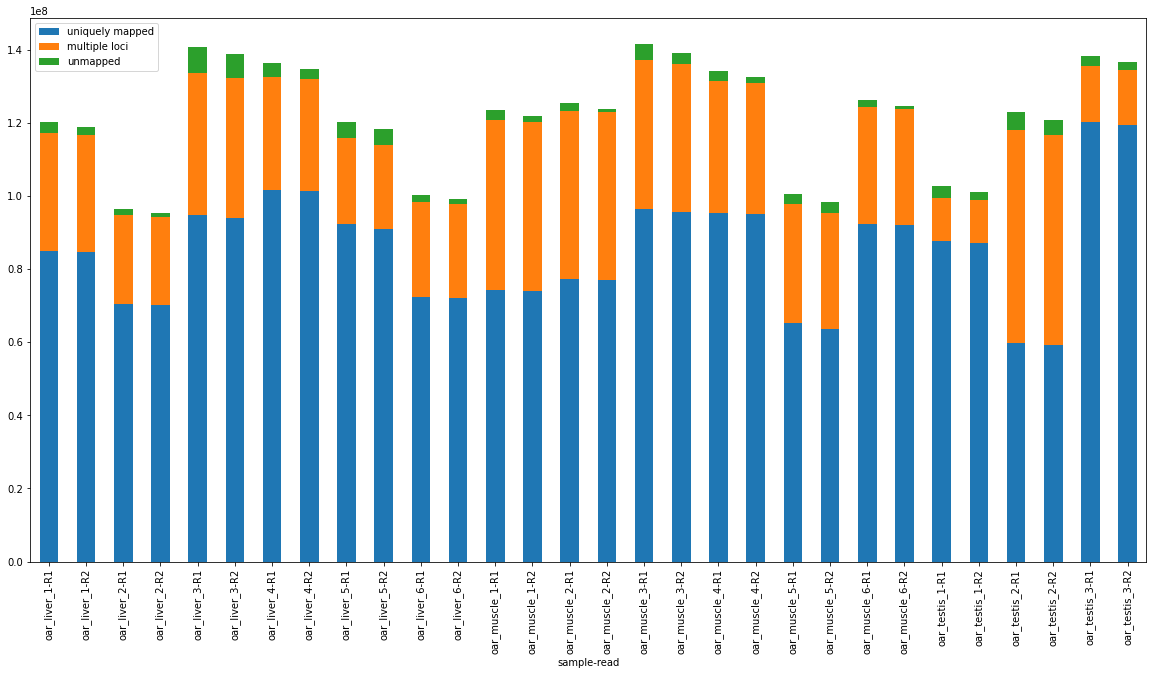

In [5]:
df_sub = df_clean[df_clean['sample'].str.contains("oar") & (~df_clean['type'].str.contains("pe"))]
axes = df_sub.plot.bar(x='sample-read', stacked=True, figsize=(20,10))

### Sus scrofa

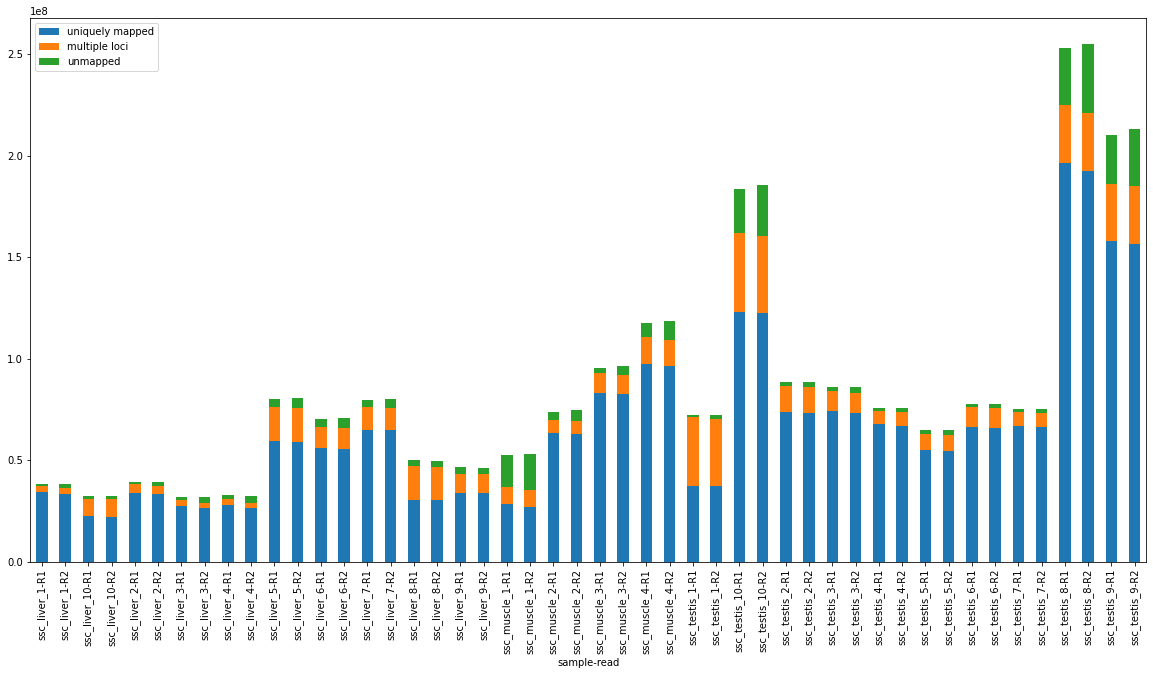

In [6]:
df_sub = df_clean[df_clean['sample'].str.contains("ssc") & (~df_clean['type'].str.contains("pe"))]
axes = df_sub.plot.bar(x='sample-read', stacked=True, figsize=(20,10))